In [46]:
from sklearn.datasets import fetch_openml

In [47]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
x= boston.data
y = boston.target

print(x.head())


      CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31    0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07    0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07    0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18    0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18    0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [49]:
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
df=pd.DataFrame(x, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [51]:
df['price']=y

In [54]:
scaler=preprocessing.StandardScaler().fit(x)
x_scalerd=scaler.transform(x)

In [56]:
x_scalerd.mean(axis=0)

array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16, -3.51058664e-17,
       -1.96592852e-16, -1.08828186e-16, -1.47444639e-16, -8.42540793e-17,
       -1.12338772e-16,  0.00000000e+00, -4.21270397e-16, -7.44244367e-16,
       -3.08931624e-16])

In [57]:
x_scalerd.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
x_train, x_test,y_train,y_test=train_test_split(x_scalerd,y,test_size=0.3, random_state=42)

In [59]:
x_train.shape

(354, 13)

In [60]:
x_test.shape

(152, 13)

In [61]:
y_train.shape

(354,)

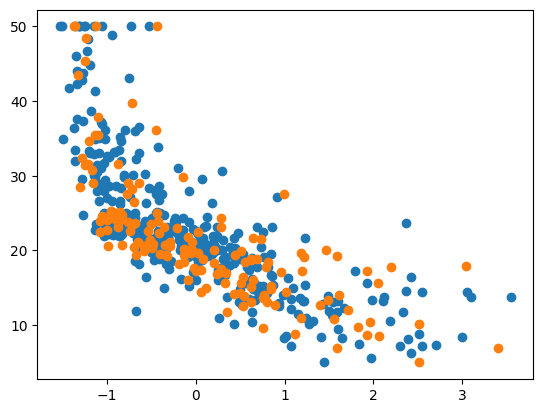

In [64]:
plt.scatter(x_train[:,12],y_train)
plt.scatter(x_test[:,12],y_test)

In [65]:
model=MLPRegressor(hidden_layer_sizes=(150,20), activation='logistic', solver='adam', random_state=1, max_iter=5000,verbose=True)
model.fit(x_train, y_train)

Iteration 1, loss = 303.79135746
Iteration 2, loss = 300.75540414
Iteration 3, loss = 297.82107626
Iteration 4, loss = 294.82073492
Iteration 5, loss = 292.00072727
Iteration 6, loss = 289.30113417
Iteration 7, loss = 286.68983716
Iteration 8, loss = 284.23131680
Iteration 9, loss = 281.91586335
Iteration 10, loss = 279.75654850
Iteration 11, loss = 277.71074972
Iteration 12, loss = 275.80350461
Iteration 13, loss = 274.06902117
Iteration 14, loss = 272.41641867
Iteration 15, loss = 270.90366238
Iteration 16, loss = 269.47692259
Iteration 17, loss = 268.13007060
Iteration 18, loss = 266.88311183
Iteration 19, loss = 265.70022172
Iteration 20, loss = 264.59878113
Iteration 21, loss = 263.52848745
Iteration 22, loss = 262.51106073
Iteration 23, loss = 261.54519242
Iteration 24, loss = 260.60944208
Iteration 25, loss = 259.68995330
Iteration 26, loss = 258.82117309
Iteration 27, loss = 257.95491633
Iteration 28, loss = 257.12931219
Iteration 29, loss = 256.31162757
Iteration 30, loss = 25

MLPRegressor(activation='logistic', hidden_layer_sizes=(150, 20), max_iter=5000,
             random_state=1, verbose=True)

In [67]:
yhat=model.predict(x.values)
yhat_train=model.predict(x_train)
yhat_test=model.predict(x_test)


Text(0, 0.5, 'predicted_price')

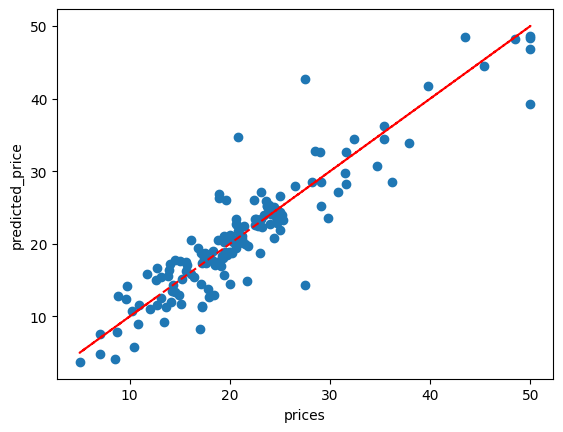

In [68]:
plt.scatter(y_test,yhat_test)
plt.plot(y_test,y_test,'r--')
plt.xlabel('prices')
plt.ylabel('predicted_price')

In [69]:
met.mean_squared_error(y_test,yhat_test)

12.308773402691015

In [71]:
model.score(x_train,y_train)

0.9957567514215183

In [73]:
model.score(x_test,y_test)

0.8348106019635153